# Train the First Prototype Neural Network

## What's happening in this notebook?

Use the fastai framework to train a ResNet based neural network able to classify seven different classes of types of trash.

Please note that this is the very first prototype and that neither the training nor the data are perfect. This notebook is used to try and experiment settings and find out if the general approach taken by the team is feasible and appropriate. If this works well, we will expand on it and add more classes etc. and probably most importantly get better training data.

## Architecture

The model currently is built on top of a Resnet with 18 layers (resnet18). https://pytorch.org/hub/pytorch_vision_resnet/

## Data

### Classes

- banana peel
- cardboard
- glass bottle 
- orange
- paper
- plastic packaging
- smartphone

The classes were selected to be easily distinguishable while at the same time we think that they can be found frequently in any household.

### Image Data

Data was previously downloaded using Bing image search API and fastbook functionality. The data set was curated briefly by removing damaged files and incorrectly assigned data.

## Other

Code is based on the fastbook.



# Train a Vision Learner using fastai

In [ ]:
# install the fastbook library
!pip install -Uqq fastbook

In [2]:
# import libraries
# fastbook/fastai related libraries: used for training the classifier
from fastbook import *
from fastai.vision.widgets import *
# enable operational system interface
import os

In [ ]:
# enable using google drive
from google.colab import drive
# mount google drive
drive.mount('/content/drive')

In [4]:
# set the path, where the image data is saved
# it was previously downloaded using the notebook "downloading_image_data.ipynb"
# depending on your specific setup, you might want to change this path
path = Path('drive/MyDrive/Training_WasteWise')

In [5]:
# list files in the specified directory to make sure the correct image data is there
# optional: consider even taking a look in the directories
os.listdir(path)

['paper',
 'cardboard',
 'smartphone',
 'banana_peel',
 'glass_bottle',
 'orange',
 'plastic_packaging']

In [6]:
# initialise the DataBlock API
waste = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
# make data loaders batches for handing to the classifier
dls = waste.dataloaders(path)

/usr/local/lib/python3.8/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


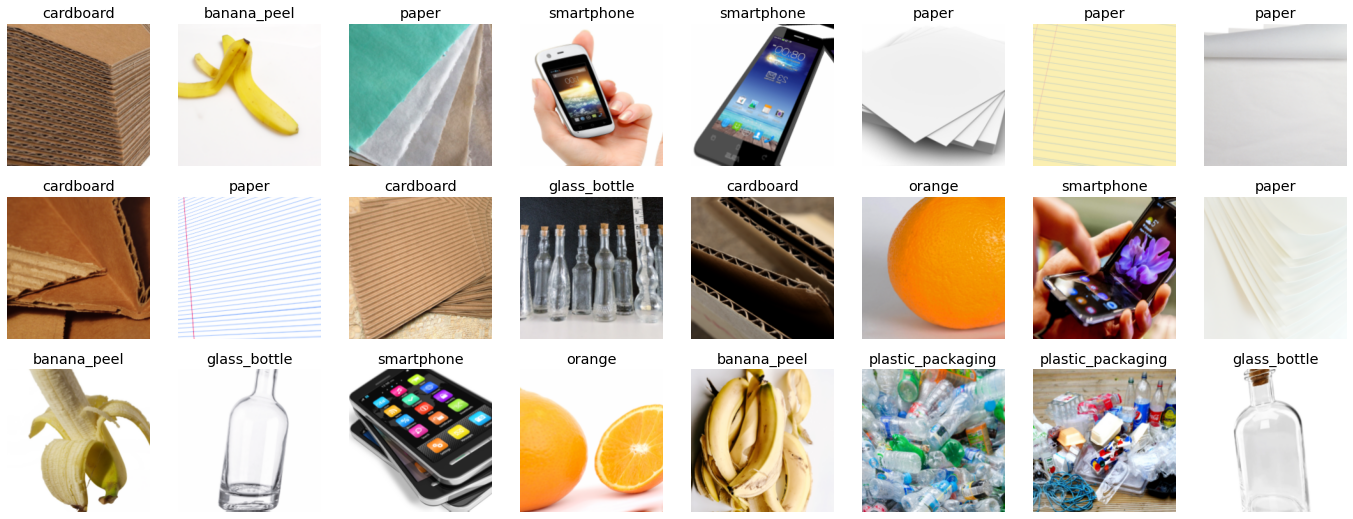

In [7]:
# display some of the image data from the training set to get a feel for it
# all images must be square. if they are not, they are resized
# default method for resizing is taking the center square
# since always taking the center square has its drawbacks,
# use the random resize to get a trade-off between different options
dls.train.show_batch(max_n=24, nrows=3)

In [8]:
# train/fine tune the vision learner
# in this case, we fine tune a ResNet with 18 layers
# the argument arch stands for architecture which we fine tune 
# choose arch from resnet18, resnet34, resnet50, resnet101, resnet152
# number corresponds to the number of layers
learn = vision_learner(dls, arch = resnet18, metrics=error_rate)
learn.fine_tune(4)

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,3.639704,3.293810,0.810811,01:32


epoch,train_loss,valid_loss,error_rate,time
0,2.408652,1.867913,0.621622,00:18
1,1.714348,0.688037,0.162162,00:17
2,1.261649,0.382012,0.108108,00:22
3,0.975830,0.301367,0.081081,00:16


After 4 epochs of training, the classifier has an accuracy of about 92%.

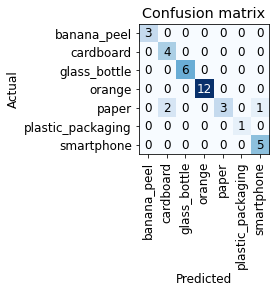

In [9]:
# plot the confusion matrix
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

Two examples from the class paper were falsely classified as cardboard and one was falsely classified as a smartphone. \
Apart from that, using this specific training and validation set, the classifier made no other mistakes. \
The falsely classified examples can be seen down below.

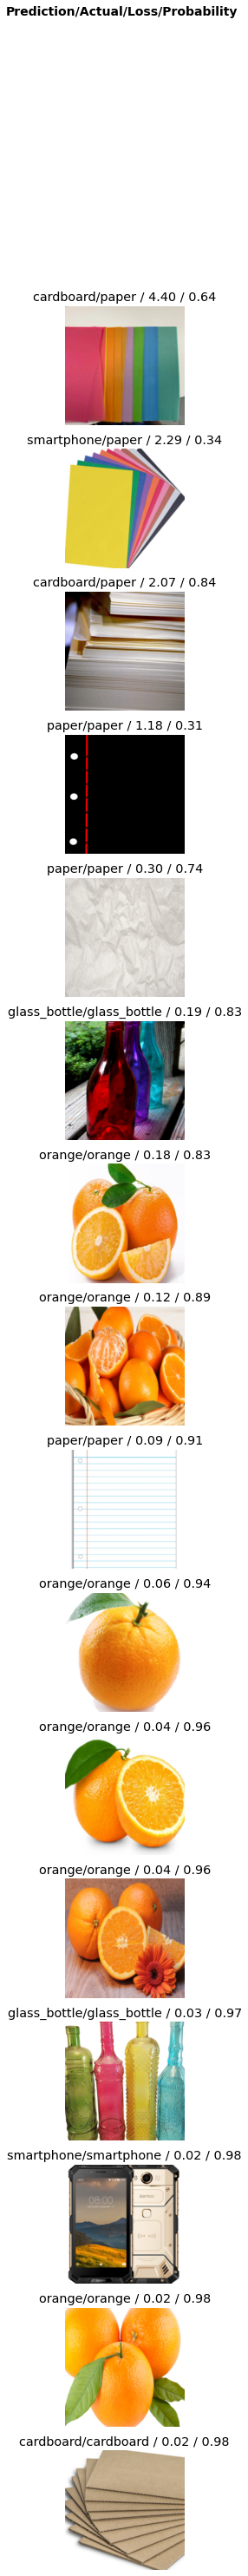

In [10]:
# plot the top losses
# this corresponds to the falsely classified examples 
# as well as those the classifier was least confident with
interp.plot_top_losses(16, nrows=16)

In [11]:
# widget to display the image data by class and by set
# enables editing
# since we downloaded the data automatically using an image search API, it is not curated yet
# some images may be included that do not belong there
# here you can remove them
cleaner = ImageClassifierCleaner(learn)
cleaner

In [12]:
# export the model to a file
# with no argument passed, it is saved right here in the working directory
# default name is "export.pkl"
# you can hand an argument like for example "prototype_waste_recogniser_v1.pkl" to use that name for saving
learn.export("prototype_waste_recogniser_fastai_v1.pkl")